In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import to_categorical

import os
import sys  
sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\MWCNN')

from Layers.DMWT import *
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
nb_classes = 10
batch_size = 32
epochs = 40

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
input_shape = (28, 28, 1)

# optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
optimizer = SGD(lr=lr, momentum=beta_1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)


In [3]:
# load DWT db2 model
input_shape = (28, 28, 1) 

x_input = layers.Input(shape=input_shape)
x = DMWT('ghm')(x_input)
x = layers.Flatten()(x)
x = layers.Dense(nb_classes, activation="softmax")(x)

model = Model(x_input, x, name="mymodel")
model.summary()



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
dmwt (DMWT)                  (None, 56, 56, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 31,370
Trainable params: 31,370
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

In [5]:
history = model.fit(x_train, y_train,
                    validation_split=1 - trainFactor,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 - 4s - loss: 1.4330 - acc: 0.6691 - val_loss: 0.9403 - val_acc: 0.8197
Epoch 2/40
48000/48000 - 3s - loss: 0.8277 - acc: 0.8251 - val_loss: 0.6859 - val_acc: 0.8533
Epoch 3/40
48000/48000 - 4s - loss: 0.6677 - acc: 0.8483 - val_loss: 0.5837 - val_acc: 0.8673
Epoch 4/40
48000/48000 - 3s - loss: 0.5905 - acc: 0.8595 - val_loss: 0.5268 - val_acc: 0.8749
Epoch 5/40
48000/48000 - 3s - loss: 0.5435 - acc: 0.8661 - val_loss: 0.4900 - val_acc: 0.8811
Epoch 6/40
48000/48000 - 3s - loss: 0.5113 - acc: 0.8718 - val_loss: 0.4643 - val_acc: 0.8838
Epoch 7/40
48000/48000 - 3s - loss: 0.4876 - acc: 0.8760 - val_loss: 0.4449 - val_acc: 0.8876
Epoch 8/40
48000/48000 - 3s - loss: 0.4691 - acc: 0.8789 - val_loss: 0.4297 - val_acc: 0.8894
Epoch 9/40
48000/48000 - 3s - loss: 0.4544 - acc: 0.8809 - val_loss: 0.4175 - val_acc: 0.8923
Epoch 10/40
48000/48000 - 3s - loss: 0.4422 - acc: 0.8836 - val_loss: 0.4072 - val_acc: 0.8946
Epoch 11/

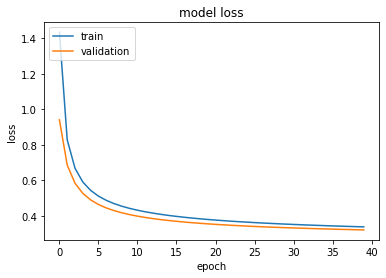

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()